# Data Preprocessing

## Imports and Setup

In [1]:
import os
import sys
sys.path.insert(0, "../utils/")
import geoutils
import cnn_utils
import config

import pandas as pd
import numpy as np
import geopandas as gpd

pd.set_option('mode.chained_assignment', None)
%load_ext autoreload
%autoreload 2

## Parameters

In [10]:
exp_config = '../configs/RGB_DOM.yaml'
c = config.load_config(exp_config, prefix='.')
rgb_path = os.path.join(c['tile_dir'], "RGB")

In [11]:
bldgs_file = f"bldgs_drone_kalinaw-salybia_DOM.gpkg"
bldgs_path = os.path.join(c['vectors_dir'], bldgs_file)
bldgs = gpd.read_file(bldgs_path).reset_index(drop=True)
bldgs["roof_type"] = None
bldgs["roof_material"] = None
bldgs["roof_condition"] = None
bldgs["UID"] = bldgs.index
print(f"Dimensions: {bldgs.shape}")
bldgs.head(3)

Dimensions: (261, 6)


,area,geometry,roof_type,roof_material,roof_condition,UID
0,47.940989,"POLYGON ((686448.140 1713716.178, 686449.733 1...",None,None,None,0
1,119.291257,"POLYGON ((686463.224 1713730.418, 686463.647 1...",None,None,None,1
2,10.818429,"POLYGON ((686446.774 1713727.979, 686447.392 1...",None,None,None,2


In [12]:
columns = ['UID','geometry', 'roof_type', 'roof_material', 'roof_condition', 'area']
filepath = os.path.join(c['vectors_dir'],  bldgs_file)
bldgs[columns].to_file(filepath, driver='GPKG')
bldgs[columns].head(3)

,UID,geometry,roof_type,roof_material,roof_condition,area
0,0,"POLYGON ((686448.140 1713716.178, 686449.733 1...",None,None,None,47.940989
1,1,"POLYGON ((686463.224 1713730.418, 686463.647 1...",None,None,None,119.291257
2,2,"POLYGON ((686446.774 1713727.979, 686447.392 1...",None,None,None,10.818429


## Inspect Data Annotations

In [ ]:
bldgs = geoutils.get_annotated_bldgs(c, index=0)
bldgs.head(3)

In [41]:
exp_config = '../configs/data/RGB_DOM.yaml'
c = config.load_config(exp_config, prefix='.')
filename = os.path.join(c['csv_dir'], f"{c['config_name']}.csv")
data = pd.read_csv(filename)
data.head(3)

,aoi,filename,image_src,roof_type,roof_material,dataset
0,DOM,./data/tiles/RGB\DOM-975-NO_ROOF-INCOMPLETE.tif,ORTHO,NO_ROOF,INCOMPLETE,TRAIN
1,DOM,./data/tiles/RGB\DOM-1023-GABLE-BLUE_TARP.tif,ORTHO,GABLE,BLUE_TARP,TRAIN
2,DOM,./data/tiles/RGB\DOM-1037-HIP-HEALTHY_METAL.tif,ORTHO,HIP,HEALTHY_METAL,TRAIN


In [43]:
data[data.isnull().any(axis=1)]

,aoi,filename,image_src,roof_type,roof_material,dataset
6939,ROSEAU_DOM,./data/tiles/RGB\ROSEAU_DOM-11949-GABLE-nan.tif,DRONE,GABLE,NaN,TRAIN
6943,ROSEAU_DOM,./data/tiles/RGB\ROSEAU_DOM-11961-GABLE-nan.tif,DRONE,GABLE,NaN,TRAIN
6950,ROSEAU_DOM,./data/tiles/RGB\ROSEAU_DOM-11981-GABLE-nan.tif,DRONE,GABLE,NaN,TRAIN


## Inspect Image Crops

In [ ]:
geoutils.inspect_image_crops(
    bldgs, 
    column='roof_material', 
    value='INCOMPLETE',
    rgb_path=rgb_path, 
    lidar_path=lidar_path, 
    aoi=c['aoi'],
    index=50, 
    n_rows=5,
    n_cols=10,
    figsize=(20,20)
)

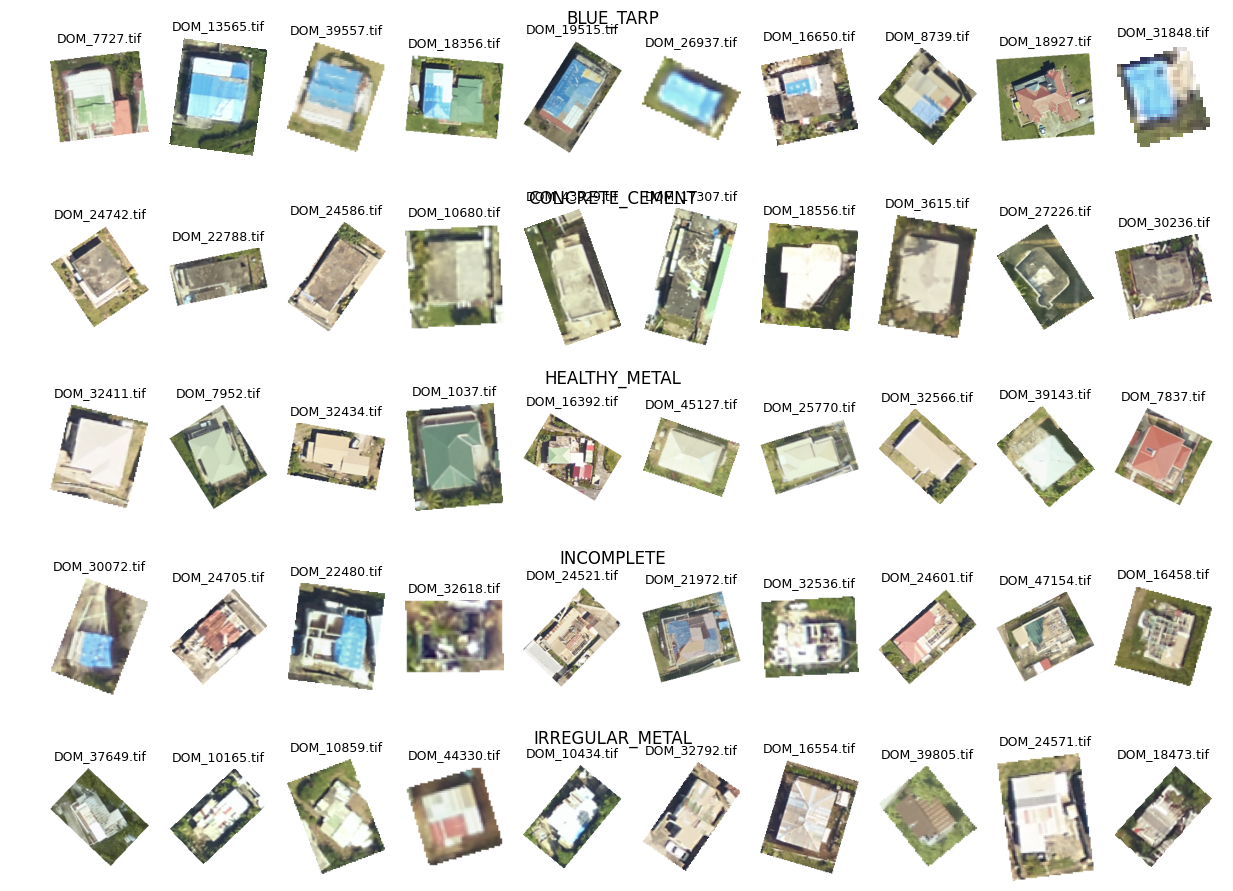

In [11]:
n_samples = 10
geoutils.visualize_image_crops(
    rgb_path, 
    'roof_material', 
    n_samples=10, 
    n_channels=3, 
    figsize=(15,9)
)

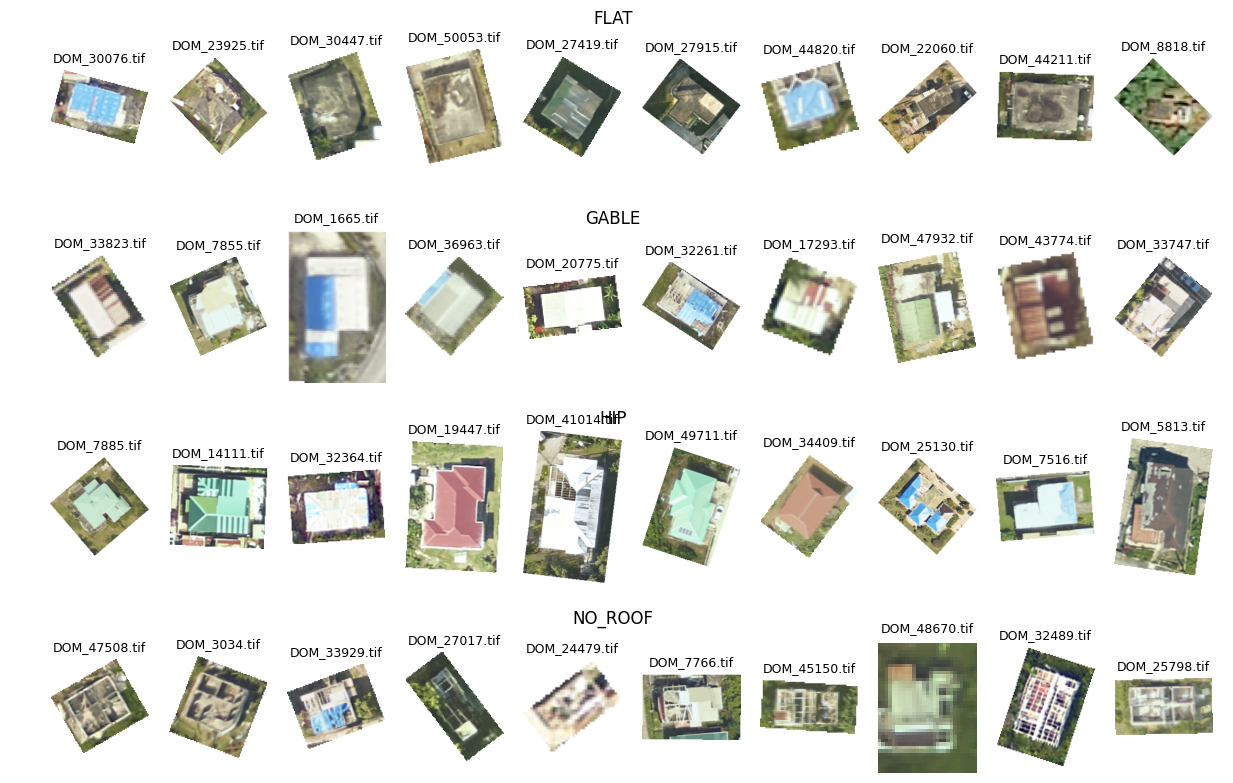

In [13]:
geoutils.visualize_image_crops(
    rgb_path, 
    'roof_type', 
    n_samples=10, 
    n_channels=3, 
    figsize=(15,8)
)

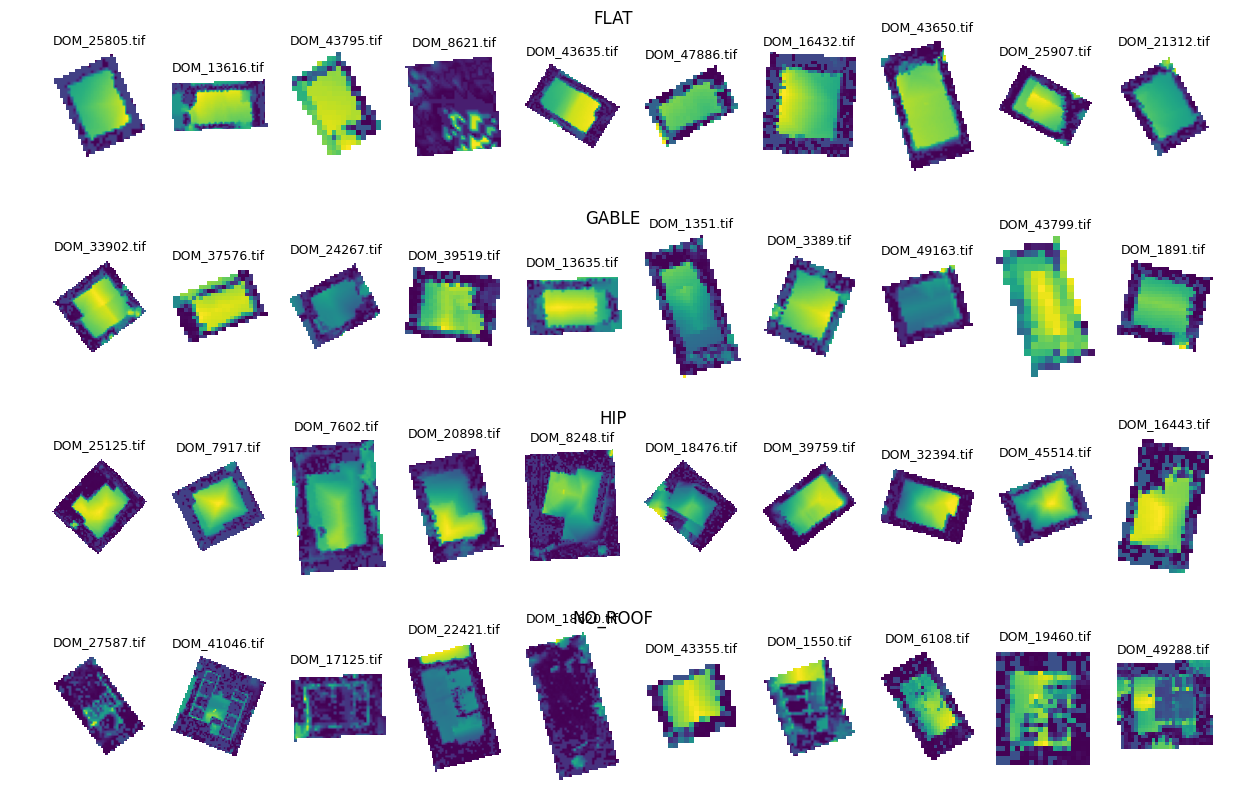

In [12]:
geoutils.visualize_image_crops(
    lidar_path, 
    'roof_type', 
    n_samples=10, 
    n_channels=1, 
    figsize=(15,8)
)